In [2]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gsw
import cmocean as cm
import arrow
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
## retrieve days as arrow objects

start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [5]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = w['gdept_1d'][0,:]

In [6]:
#LO_AOUmethod_stoicCO_diseq_allup_y2015m12d29_preind_DIC.nc

newPI_DIC = np.zeros([365,40,950])
newPI_sigma0 = np.zeros([365,40,950])
for i in range(0,365):

    tdate = arrow_array[i][0]
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}'

#     if i%60 == 0:
        #print(ymd)
    newPI = nc.Dataset(f'./preind_DIC/LO_AOUmethod_stoicCO_diseq_allup_{ymd}_preind_DIC.nc')
   # print(newPI)
    newPI_DIC[i,:,:] = newPI['preindustrial_DIC']['preind_dic'][:,:] 
    newPI_sigma0[i,:,:] = newPI['preindustrial_DIC']['sigma0'][:,:] 
    newPI.close()

In [7]:
#retreive present day DIC and salinity
presday_DIC = np.zeros([365,40,950])
presday_TA = np.zeros([365,40,950])
presday_sal = np.zeros([365,40,950])

for i in range(0,365):

    tdate = arrow_array[i][0]
    #ymd = tdate.format('YYYY')
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}.nc'

#     if i%60 == 0:
#         #print(ymd)
    presday = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}')
    presday_DIC[i,:,:] = presday['DIC'][0,:,0,:]
    presday_TA[i,:,:] = presday['TA'][0,:,0,:]
    presday_sal[i,:,:] = presday['vosaline'][0,:,0,:]
    presday.close()



In [9]:
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
presday_JS_bc_sal = presday_JS_bc['vosaline']
presday_JS_bc_DIC = presday_JS_bc['DIC']
print(np.nanmean(presday_JS_bc_sal[:,0,:,:]))
print(np.nanmean(presday_JS_bc_sal[:,39,:,:]))

30.866781
31.67721


In [10]:
month_sal_JdF = np.zeros([12])
month_sal_JS = np.zeros([12])
for i in range (0,12):
    #print(np.nanmean(presday_sal[i*30:(i*30)+30,0,0]))
    month_sal_JdF[i] = np.nanmean(presday_sal[i*30:(i*30)+30,0,0])
    #print(np.nanmean(presday_JS_bc_sal[:,0,:,:]))
    month_sal_JS[i] = np.nanmean(presday_JS_bc_sal[i,0,:,:])

In [ ]:

#                                S              Canth
# Malasapina -    25.6         41
# ES
 
# N-SoG salty         27.5       43
# End-memOkoever (ES)
 
# JDF mouth           33           50

32.75285017144731
37.54538494221177
nan


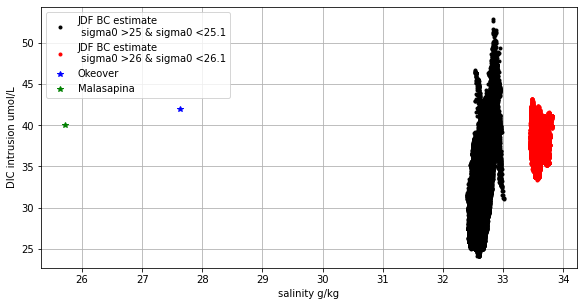

In [11]:
np.shape(newPI_sigma0)
DIC_intrusion = presday_DIC-newPI_DIC
#presday_sal 
sig25 = (newPI_sigma0 >25.0) & (newPI_sigma0 < 25.1)
print(np.nanmean(DIC_intrusion[sig25]))
sig26 = (newPI_sigma0 >26.0) & (newPI_sigma0 < 26.1)
print(np.nanmean(DIC_intrusion[sig26]))
sig27 = (newPI_sigma0 >27.0) & (newPI_sigma0 < 27.1)
print(np.nanmean(DIC_intrusion[sig27]))


fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
#axs = axs.ravel()

#plt.xticks(rotation=70)
axs.plot(presday_sal[sig25],DIC_intrusion[sig25],
            color = 'k', marker = '.', linestyle = '', \
            label = 'JDF BC estimate \n sigma0 >25 & sigma0 <25.1' )
axs.plot(presday_sal[sig26],DIC_intrusion[sig26],
            color = 'r', marker = '.', linestyle = '', \
            label = 'JDF BC estimate \n sigma0 >26 & sigma0 <26.1' )


axs.plot()
#tsal_r_psu = tsal_r*35/35.16504
axs.plot(27.5*35.16504/35,42, 'b*', label = 'Okeover')
axs.plot(25.6*35.16504/35, 40, 'g*', label ='Malasapina')
axs.legend()
axs.set_xlabel('salinity g/kg')
axs.set_ylabel('DIC intrusion umol/L')
axs.grid()

In [12]:
np.shape(month_sal_JdF)

(12,)

32.75285017144731
37.54538494221177
14.518058464735748


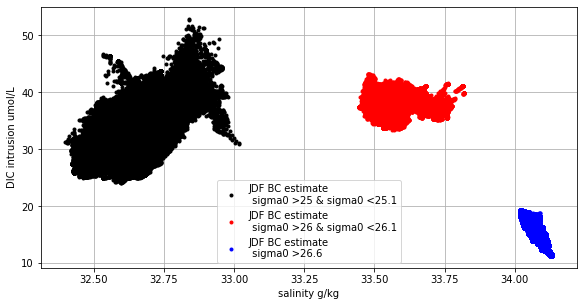

In [13]:
np.shape(newPI_sigma0)
DIC_intrusion = presday_DIC-newPI_DIC
#presday_sal 
sig25 = (newPI_sigma0 >25.0) & (newPI_sigma0 < 25.1)
print(np.nanmean(DIC_intrusion[sig25]))
sig26 = (newPI_sigma0 >26.0) & (newPI_sigma0 < 26.1)
print(np.nanmean(DIC_intrusion[sig26]))
sig27 = (newPI_sigma0 >26.6) 
print(np.nanmean(DIC_intrusion[sig27]))

presday_sal_surface = presday_sal[:,0,:]
intr_surface = np.zeros_like(presday_sal_surface)
intr_surface[:] = 50

fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
#axs = axs.ravel()

#plt.xticks(rotation=70)

axs.plot(presday_sal[sig25],DIC_intrusion[sig25],
            color = 'k', marker = '.', linestyle = '', \
            label = 'JDF BC estimate \n sigma0 >25 & sigma0 <25.1' )
axs.plot(presday_sal[sig26],DIC_intrusion[sig26],
            color = 'r', marker = '.', linestyle = '', \
            label = 'JDF BC estimate \n sigma0 >26 & sigma0 <26.1' )
axs.plot(presday_sal[sig27],DIC_intrusion[sig27],
            color = 'b', marker = '.', linestyle = '', \
            label = 'JDF BC estimate \n sigma0 >26.6' )
#axs.plot(presday_sal_surface,intr_surface,
 #           color = 'b', marker = '.', linestyle = '')
# axs.plot(month_sal_JdF,intr_surface[0:12],
#             color = 'g', marker = '*', linestyle = '', \
#          label = 'mean monthly surf. salinity - \ JdF BCs')

# axs.plot(month_sal_JS,intr_surface[0:12], color = 'orange', marker = '*', \
#          linestyle = '', label = 'mean monthly surf. salinity - \ JS BCs')

axs.plot()
#tsal_r_psu = tsal_r*35/35.16504
# axs.plot(27.5*35.16504/35,42, 'b*', label = 'Okeover')
# axs.plot(25.6*35.16504/35, 40, 'g*', label ='Malasapina')
axs.legend()
axs.set_xlabel('salinity g/kg')
axs.set_ylabel('DIC intrusion umol/L')
axs.grid()

In [15]:
# m, b = np.polyfit(x, y, 1)
# m = slope, b=intercept


# plt.plot(x, m*x + b)


DIC_intrusion = presday_DIC-newPI_DIC
# print(np.shape(DIC_intrusion))

mean_sal_deep_EM = np.zeros([12])
mean_intr_deep_EM = np.zeros([12])
for i in range(0,12):
#presday_sal 
    DIC_intrusion_mon = DIC_intrusion[i*30:(i+1)*30,:,:]
    sig26 = (newPI_sigma0[i*30:(i+1)*30,:,:] >26.0) & (newPI_sigma0[i*30:(i+1)*30,:,:] < 26.1)
    presday_sal_mon = presday_sal[i*30:(i+1)*30,:,:]
    
    mean_intr_deep_EM[i] = np.nanmean(DIC_intrusion_mon[sig26])
    mean_sal_deep_EM[i] = np.nanmean(presday_sal_mon[sig26])


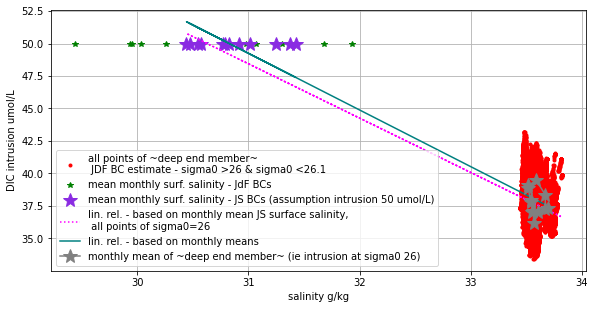

In [16]:
sig26 = (newPI_sigma0 >26.0) & (newPI_sigma0 < 26.1)    
# print(type(DIC_intrusion[sig26]))
# print(np.shape(intr_surface[0:12,0]))

intr_concat = np.concatenate((DIC_intrusion[sig26],intr_surface[0:12,0]), axis=0)
sal_concat = np.concatenate((presday_sal[sig26],month_sal_JS), axis=0)

m, b = np.polyfit(sal_concat, intr_concat, 1)
#m = slope, b=intercept

intr_concat2 = np.concatenate((mean_intr_deep_EM,intr_surface[0:12,0]), axis=0)
sal_concat2 = np.concatenate((mean_sal_deep_EM,month_sal_JS), axis=0)

m2, b2 = np.polyfit(sal_concat2, intr_concat2, 1)


fact = 0.8
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
#axs = axs.ravel()
for i in range(0,1):
    axs.plot(presday_sal[sig26],DIC_intrusion[sig26],
                color = 'r', marker = '.', linestyle = '', \
                label = 'all points of ~deep end member~ \n JDF BC estimate - sigma0 >26 & sigma0 <26.1' )

    axs.plot(month_sal_JdF,intr_surface[0:12,0],
                color = 'g', marker = '*', linestyle = '', \
             label = 'mean monthly surf. salinity - JdF BCs')

    axs.plot(month_sal_JS,intr_surface[0:12,0], color = 'blueviolet', marker = '*', markersize = 15, \
             linestyle = '', label = 'mean monthly surf. salinity - JS BCs (assumption intrusion 50 umol/L)')
    
    axs.plot(sal_concat, m*sal_concat + b, linestyle = ':', color = 'fuchsia', label = 'lin. rel. - based on monthly mean JS surface salinity, \n all points of sigma0=26')
    axs.plot(sal_concat2, m2*sal_concat2 + b2, linestyle = '-', color = 'teal', label = 'lin. rel. - based on monthly means')

    axs.plot(mean_sal_deep_EM,mean_intr_deep_EM,color = 'grey', marker = '*', markersize = 15, label = \
            'monthly mean of ~deep end member~ (ie intrusion at sigma0 26)')
axs.plot()
axs.legend(loc = 'lower left')
axs.set_xlabel('salinity g/kg')
axs.set_ylabel('DIC intrusion umol/L')

axs.grid()

In [20]:
presday_JS_bc_int =  m2*presday_JS_bc_sal + b2 
print(np.min(presday_JS_bc_int))

PI_JS_bc_DIC = presday_JS_bc_DIC-presday_JS_bc_int
print(np.shape(PI_JS_bc_DIC))

44.132477
(12, 40, 10, 30)


In [25]:


#input file
test_LO = nc.Dataset(f'//data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
#print(test_LO)
#input file for preindustrial DIC
dsin = test_LO 
#output filename
ncname = f'/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA_PIDIC_from_sal_rel.nc'

dsout = nc.Dataset(ncname, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    #print(dname)
    #print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)

# Copy variables
for v_name, varin in dsin.variables.items():
    #print(v_name)
    #if (v_name != 'DIC'):
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})

    outVar[:] = varin[:]

# copy new DIC variables
dsout['DIC'][:] = PI_JS_bc_DIC

dsout.close()